<a href="https://colab.research.google.com/github/bhuvighosh3/Comparitive-Analysis-of-Tree-Based-and-Hill-Climb-Search-Based-CPDs-for-Evidential-Inferencing/blob/main/PGM_MiniProject_51_68_191_196_177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='BayesianNetwork'></a>

## <b><span style='color:#2865C8'></span> Bayesian Network </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> What is Bayesian Network? </b></p>
</div>

### Bayesian Network

Bayesian Network is a kind of Graphical model called a Directed Acyclic Graph or DAG. It means all the edges (arcs) in the graph are directed, and there are no cycles. Each edge in the Bayesian Network encodes a joint probability factorization which would ne the the joint distribution of all nodes (variables/vertices).

$p(A, B, C) = P(A|B).P(C|B).P(C)$

### Inference

The inference would be the definition of a task that is responsible to compute the probability of each node in the Bayesian Network, assuming the known values of the other nodes. There are two different types of inference; exact and approximate.

#### Exact Inference

Different exact approaches to finding the node's probability have been applied in this notebook, such as variable elimination and junction tree algorithm.

<a id='lib'></a>
# <b><span style='color:#2865C8'></span> Importing libraries</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Used libraries for the notebook </b></p>
</div>

In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.7 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork

In [ ]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import networkx as nx
from scipy.io import arff
import matplotlib.pyplot as plt
import pgmpy.estimators as ests
from pgmpy.estimators import TreeSearch,BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import structure_score
from sklearn.metrics import accuracy_score
from pgmpy.inference import BeliefPropagation
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from pgmpy.inference import VariableElimination
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
random_state = 123
np.random.seed(random_state)
warnings.simplefilter('ignore')
np.set_printoptions(precision=2, suppress=True)

<a id='Importingdataset'></a>

# <b><span style='color:#2865C8'></span> Importing dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b></b></p>
</div>

In [ ]:
df=pd.read_csv('/content/post natal data.csv')

In [ ]:
df.isnull().sum(axis=0)

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop('Timestamp', axis=1)

In [ ]:
df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Age:
['35-40' '40-45' '30-35' '45-50' '25-30']

Unique values for Feeling sad or Tearful:
['Yes' 'No' 'Sometimes']

Unique values for Irritable towards baby & partner:
['Yes' 'No' 'Sometimes']

Unique values for Trouble sleeping at night:
['Two or more days a week' 'No' 'Yes']

Unique values for Problems concentrating or making decision:
['Yes' 'No' 'Often']

Unique values for Overeating or loss of appetite:
['Yes' 'No' 'Not at all']

Unique values for Feeling anxious:
['Yes' 'No']

Unique values for Feeling of guilt:
['No' 'Yes' 'Maybe']

Unique values for Problems of bonding with baby:
['Yes' 'Sometimes' 'No']

Unique values for Suicide attempt:
['Yes' 'No' 'Not interested to say']



In [ ]:
df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and label encode if it's categorical
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2,2,2,1,2,2,1,1,2,2
1,3,2,0,0,2,2,0,2,2,0
2,2,2,0,2,2,2,1,1,1,0
3,2,2,2,2,2,0,1,0,0,0
4,3,2,0,1,2,0,1,1,2,0


In [ ]:
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2,2,2,1,2,2,1,1,2,2
1,3,2,0,0,2,2,0,2,2,0
2,2,2,0,2,2,2,1,1,1,0
3,2,2,2,2,2,0,1,0,0,0
4,3,2,0,1,2,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
1498,1,2,0,1,0,0,1,0,1,0
1499,0,1,0,0,1,0,1,0,2,0
1500,0,0,1,1,0,0,0,2,0,1
1501,0,0,1,2,1,0,1,1,0,0


In [ ]:
df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Age:
[2 3 1 4 0]

Unique values for Feeling sad or Tearful:
[2 0 1]

Unique values for Irritable towards baby & partner:
[2 0 1]

Unique values for Trouble sleeping at night:
[1 0 2]

Unique values for Problems concentrating or making decision:
[2 0 1]

Unique values for Overeating or loss of appetite:
[2 0 1]

Unique values for Feeling anxious:
[1 0]

Unique values for Feeling of guilt:
[1 2 0]

Unique values for Problems of bonding with baby:
[2 1 0]

Unique values for Suicide attempt:
[2 0 1]



<a id='Definingtheinputdata'></a>

## <b><span style='color:#2865C8'></span> Defining the input data</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> return X, y </b></p>
</div>

In [ ]:
X = df.drop(columns=['Feeling anxious'],axis=1)
y = df['Feeling anxious']

<a id='Featureengineering'></a>

## <b><span style='color:#2865C8'></span> Feature engineering </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Variable elimination due to selecting the highest score of Chi-squared </b></p>
</div>

In [ ]:
fs = SelectKBest(score_func=chi2, k=8)
f_best = fs.fit_transform(X, y)
top_features = sorted(zip(list(X.columns), fs.scores_), key=lambda x: x[1], reverse=True)
top_features

[('Feeling of guilt', 72.95242988938031),
 ('Problems of bonding with baby', 53.2862442777557),
 ('Overeating or loss of appetite', 35.41955077749806),
 ('Problems concentrating or making decision', 29.562012746898066),
 ('Trouble sleeping at night', 12.849097175926513),
 ('Age', 3.4713124038612424),
 ('Suicide attempt', 2.3357702885200227),
 ('Feeling sad or Tearful', 1.966983680554224),
 ('Irritable towards baby & partner', 0.8765237770901146)]

In [ ]:
df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Every variable seems of good importanc in the chi square test so we are not dropping any of the columns as of now without proper use of PGM Algorithms </b></p>
</div>

<a id='Jointprobability'></a>

## <b><span style='color:#2865C8'></span> Joint probability</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Simple example </b></p>
</div>

In [ ]:
data = df

In [ ]:
joint_probability = data.groupby([data.columns], axis=1).size()/data.shape[0]
pd.DataFrame(joint_probability)

,0
Age,0.000671
Feeling anxious,0.000671
Feeling of guilt,0.000671
Feeling sad or Tearful,0.000671
Irritable towards baby & partner,0.000671
Overeating or loss of appetite,0.000671
Problems concentrating or making decision,0.000671
Problems of bonding with baby,0.000671
Suicide attempt,0.000671
Trouble sleeping at night,0.000671


This could be an indication that the data is either highly uniform or that the specific groupings of values in each variable are evenly distributed.

<a id='BayesianModels'></a>

# <b><span style='color:#2865C8'></span> Bayesian Models</b>


## <b><span style='color:#2865C8'></span> DAG </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Probabilistic Directed Acyclic Graphical - pDAG </b></p>
</div>


#### To have the Bayesian Network over this example, we need to define dependencies between pairwise variables.

#### For the structure learning techniques, There are various standards such as Hill Climb search, Structure score, Tree search, Exhaustive search, etc. The one I used for this illustration was the Tree search.

Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

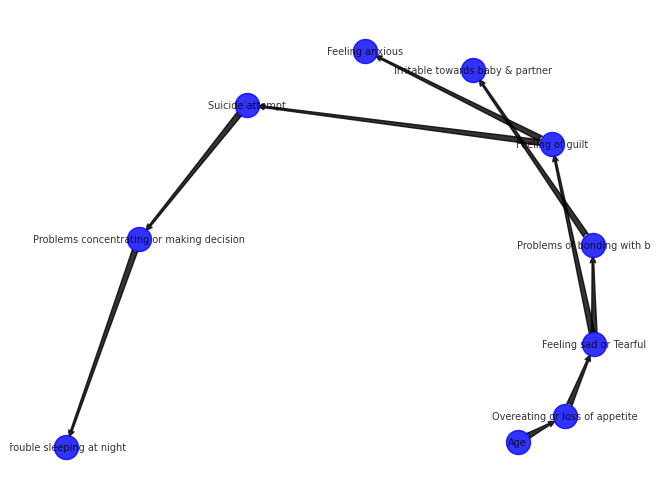

In [ ]:
est = TreeSearch(data, root_node='Age')
dag = est.estimate(estimator_type='chow-liu')
pos = nx.spiral_layout(dag)
nx.draw(dag, pos=pos, with_labels=True,node_color='b', font_size=7, arrowstyle='fancy', alpha=0.8)

1. **Compute Mutual Information:**
   - Calculate mutual information \(I(X_i; X_j)\) for each pair of variables \(X_i\) and \(X_j\) in the dataset. This quantifies the strength of the relationship between variables.

2. **Build Fully Connected Graph:**
   - Form a fully connected undirected graph, where nodes represent variables and edges denote the mutual information between corresponding variable pairs.

3. **Compute Maximum Spanning Tree:**
   - Apply a maximum spanning tree algorithm (e.g., Kruskal's or Prim's) to identify the tree structure that connects all nodes while minimizing edge weights. Edges in this tree represent the strongest pairwise dependencies.

4. **Convert to DAG:**
   - Designate a root node and orient edges to create a directed acyclic graph (DAG). The root becomes the parent, and other nodes are its children in the directed structure.

5. **Resulting Bayesian Network:**
   - The DAG signifies the Bayesian Network structure. Nodes represent variables, and directed edges denote conditional dependencies between variables. The algorithm assumes relationships can be approximated by a tree structure.

6. **Parameter Estimation:**
   - Estimate Bayesian Network parameters based on the dataset.
   - For each DAG node, estimate the conditional probability distribution given its parent(s).

7. **Bayesian Network Construction:**
   - Combine the learned DAG structure with estimated parameters to construct the complete Bayesian Network.

<a id='INFOs'></a>

## <b><span style='color:#2865C8'></span> DAG INFOs</b>

In [ ]:
print("Nodes: ", dag.nodes())
print("---------------")
print("Edges: ", dag.edges())

print("--------" "\n")

nx.to_pandas_edgelist(dag)

Nodes:  ['Age', 'Overeating or loss of appetite', 'Feeling sad or Tearful', 'Problems of bonding with baby', 'Feeling of guilt', 'Irritable towards baby & partner', 'Feeling anxious', 'Suicide attempt', 'Problems concentrating or making decision', 'Trouble sleeping at night']
---------------
Edges:  [('Age', 'Overeating or loss of appetite'), ('Overeating or loss of appetite', 'Feeling sad or Tearful'), ('Feeling sad or Tearful', 'Problems of bonding with baby'), ('Feeling sad or Tearful', 'Feeling of guilt'), ('Problems of bonding with baby', 'Irritable towards baby & partner'), ('Feeling of guilt', 'Feeling anxious'), ('Feeling of guilt', 'Suicide attempt'), ('Suicide attempt', 'Problems concentrating or making decision'), ('Problems concentrating or making decision', 'Trouble sleeping at night')]
--------



,source,target,weight
0,Age,Overeating or loss of appetite,None
1,Overeating or loss of appetite,Feeling sad or Tearful,None
2,Feeling sad or Tearful,Problems of bonding with baby,None
3,Feeling sad or Tearful,Feeling of guilt,None
4,Problems of bonding with baby,Irritable towards baby & partner,None
5,Feeling of guilt,Feeling anxious,None
6,Feeling of guilt,Suicide attempt,None
7,Suicide attempt,Problems concentrating or making decision,None
8,Problems concentrating or making decision,Trouble sleeping at night,None


<a id='Conditionalprobability'></a>

## <b><span style='color:#2865C8'></span> Bayesian Network</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Return the (Estimation of) Conditional probability based on the time as the root node. </b></p>
</div>

In [ ]:
from IPython.display import Image, display

Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

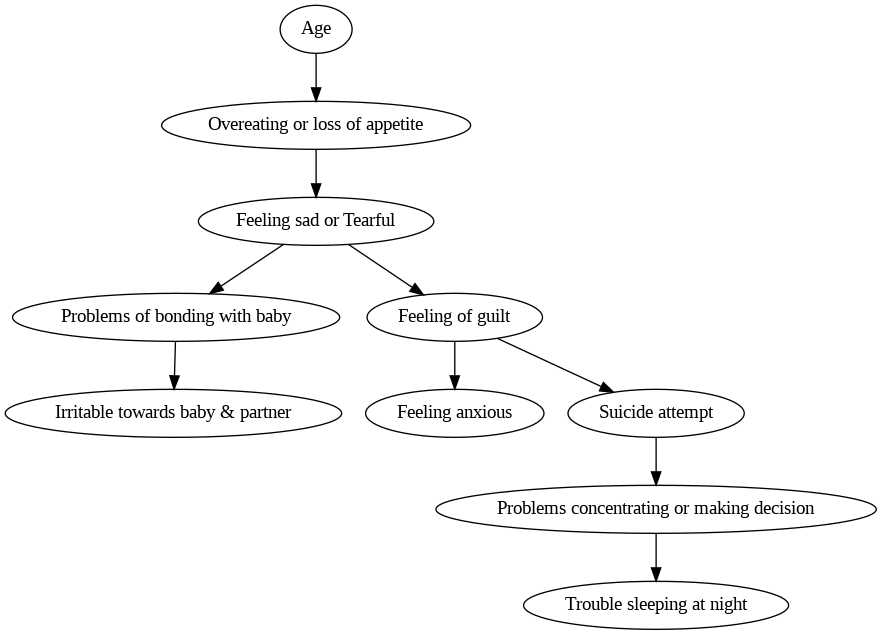

In [ ]:
hc1 = TreeSearch(data, root_node='Age')
est_model1 = hc1.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1)).create_png()))

The code is designed to explore and visualize the hierarchical structure within a dataset. It uses a custom TreeSearch class to estimate the hierarchy, with the root node set to 'Age.' The resulting hierarchical model is represented as a directed graph, and the code converts it into a visual format for better understanding.

This visualization aids in comprehending the relationships and dependencies within the data, facilitating a more intuitive exploration of its organizational structure.

The combination of the TreeSearch class and NetworkX provides a powerful tool for hierarchical analysis and visualization in a Python environment.

In [ ]:
model = BayesianNetwork(dag)
model.fit(data)
model.get_cpds()

[<TabularCPD representing P(Age:5) at 0x7d08d88f3ca0>,
 <TabularCPD representing P(Overeating or loss of appetite:3 | Age:5) at 0x7d08d88f3c10>,
 <TabularCPD representing P(Feeling sad or Tearful:3 | Overeating or loss of appetite:3) at 0x7d08d88f3bb0>,
 <TabularCPD representing P(Problems of bonding with baby:3 | Feeling sad or Tearful:3) at 0x7d08d88f3c40>,
 <TabularCPD representing P(Feeling of guilt:3 | Feeling sad or Tearful:3) at 0x7d08d88f3b50>,
 <TabularCPD representing P(Irritable towards baby & partner:3 | Problems of bonding with baby:3) at 0x7d08d88f3dc0>,
 <TabularCPD representing P(Feeling anxious:2 | Feeling of guilt:3) at 0x7d08d88f3be0>,
 <TabularCPD representing P(Suicide attempt:3 | Feeling of guilt:3) at 0x7d08d88f3d60>,
 <TabularCPD representing P(Problems concentrating or making decision:3 | Suicide attempt:3) at 0x7d08d894c4f0>,
 <TabularCPD representing P(Trouble sleeping at night:3 | Problems concentrating or making decision:3) at 0x7d08d894c460>]

Retrieves the Conditional Probability Distributions (CPDs) for each variable in the Bayesian Network using the get_cpds method. CPDs provide the probability of a variable given its parents in the network.

<a id='Inference'></a>

## <b><span style='color:#2865C8'></span> Inference</b>

### <b><span style='color:#2865C8'></span> Variable Elimination</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Initialize the inference by Variable Elimination method </b></p>
</div>

In [ ]:
infer = VariableElimination(model)
q = infer.query(variables=['Feeling anxious'], evidence={"Age": 1}, joint=False)
print(q['Feeling anxious'])

+--------------------+------------------------+
| Feeling anxious    |   phi(Feeling anxious) |
+====================+========================+
| Feeling anxious(0) |                 0.3514 |
+--------------------+------------------------+
| Feeling anxious(1) |                 0.6486 |
+--------------------+------------------------+


In [ ]:
infer = VariableElimination(model)
q1 = infer.query(variables=['Feeling anxious'], evidence={"Overeating or loss of appetite": 1}, joint=False)
print(q1['Feeling anxious'])

+--------------------+------------------------+
| Feeling anxious    |   phi(Feeling anxious) |
+====================+========================+
| Feeling anxious(0) |                 0.3530 |
+--------------------+------------------------+
| Feeling anxious(1) |                 0.6470 |
+--------------------+------------------------+


In [ ]:
infer = VariableElimination(model)
q2 = infer.query(variables=['Feeling anxious'], evidence={'Age':0,'Feeling of guilt':1}, joint=False)
print(q2['Feeling anxious'])

+--------------------+------------------------+
| Feeling anxious    |   phi(Feeling anxious) |
+====================+========================+
| Feeling anxious(0) |                 0.1079 |
+--------------------+------------------------+
| Feeling anxious(1) |                 0.8921 |
+--------------------+------------------------+


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
for variable in model.nodes:
    cpd = MaximumLikelihoodEstimator(model, data).estimate_cpd(variable)
    model.add_cpds(cpd)

# Function to calculate Min-fill heuristic for a variable in a graph
def min_fill_heuristic(graph, variable):
    neighbors = set(graph.neighbors(variable))
    fill_edges = set()

    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and not graph.has_edge(neighbor1, neighbor2):
                fill_edges.add((neighbor1, neighbor2))

    return len(fill_edges)

# Find the variable elimination order using Min-fill heuristic
elimination_order_ = []
remaining_variables_ = set(model.nodes)

# Reverse the order to start eliminating from variables with fewer dependencies
while remaining_variables_:
    variable_scores_ = {variable: min_fill_heuristic(model, variable) for variable in remaining_variables_}
    min_score_variable_ = min(variable_scores_, key=variable_scores_.get)

    # Add "DEATH_EVENT" at the end of the elimination order
    if min_score_variable_ != 'Feeling anxious':
        elimination_order_.append(min_score_variable_)

    remaining_variables_.remove(min_score_variable_)

# Print the calculated variable elimination order
print("Variable Elimination Order:", elimination_order_)

# Perform Variable Elimination with the calculated order
infer = VariableElimination(model)

Variable Elimination Order: ['Suicide attempt', 'Age', 'Overeating or loss of appetite', 'Trouble sleeping at night', 'Problems of bonding with baby', 'Irritable towards baby & partner', 'Problems concentrating or making decision', 'Feeling sad or Tearful', 'Feeling of guilt']


Updating the Conditional Probability Distributions (CPDs) in a Bayesian Network using Maximum Likelihood Estimation (MLE) and then determining an efficient variable elimination order based on the Min-fill heuristic.

The code iterates through each variable in the network, estimates its CPD using MLE, and incorporates the updated CPD into the model. Following this, the Min-fill heuristic is applied to find an optimal order for variable elimination, considering the minimal number of edges to be added.

The resulting elimination order is printed, and Variable Elimination is performed on the Bayesian Network using this order. This process streamlines probabilistic inference by eliminating variables strategically, enhancing computational efficiency.




<a id='Prediction'></a>

## <b><span style='color:#2865C8'></span> Prediction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Initialize the inference by Variable Elimination method </b></p>
</div>

In [ ]:
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
import networkx as nx

In [ ]:
test = np.squeeze(data.iloc[:, -1].values)
predict_data = data.iloc[:, :-1]
y_pred = model.predict(predict_data)
accuracy=accuracy_score(np.squeeze(y_pred.values), test)

  0%|          | 0/319 [00:00<?, ?it/s]

## Start node: Suicide Attempt:

Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

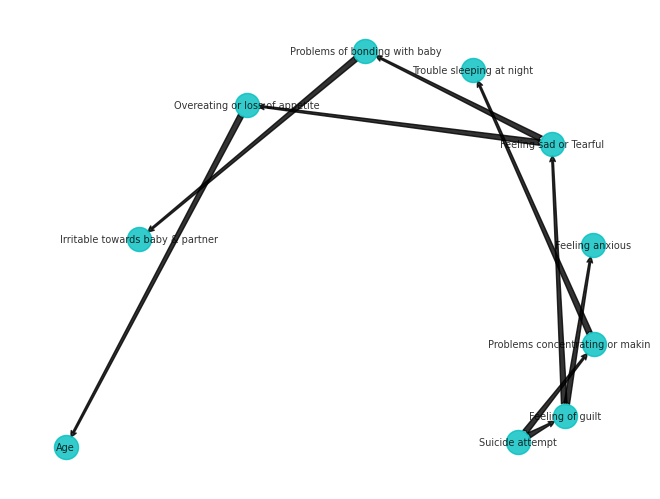

In [ ]:
est = TreeSearch(data, root_node='Suicide attempt')
dag = est.estimate(estimator_type='chow-liu')
pos = nx.spiral_layout(dag)
nx.draw(dag, pos=pos, with_labels=True,node_color='c', font_size=7, arrowstyle='fancy', alpha=0.8)

In [ ]:
model = BayesianNetwork(dag)
model.fit(data)
model.get_cpds()

[<TabularCPD representing P(Suicide attempt:3) at 0x7d08d898b760>,
 <TabularCPD representing P(Feeling of guilt:3 | Suicide attempt:3) at 0x7d08d898a110>,
 <TabularCPD representing P(Problems concentrating or making decision:3 | Suicide attempt:3) at 0x7d08d8988130>,
 <TabularCPD representing P(Feeling anxious:2 | Feeling of guilt:3) at 0x7d08d89880d0>,
 <TabularCPD representing P(Feeling sad or Tearful:3 | Feeling of guilt:3) at 0x7d08d8988040>,
 <TabularCPD representing P(Trouble sleeping at night:3 | Problems concentrating or making decision:3) at 0x7d08d8988100>,
 <TabularCPD representing P(Problems of bonding with baby:3 | Feeling sad or Tearful:3) at 0x7d08d8988190>,
 <TabularCPD representing P(Overeating or loss of appetite:3 | Feeling sad or Tearful:3) at 0x7d08d89881c0>,
 <TabularCPD representing P(Irritable towards baby & partner:3 | Problems of bonding with baby:3) at 0x7d08d89881f0>,
 <TabularCPD representing P(Age:5 | Overeating or loss of appetite:3) at 0x7d08d8988220>]

In [ ]:
infer = VariableElimination(model)
q = infer.query(variables=['Feeling anxious'], evidence={"Overeating or loss of appetite": 1.}, joint=False)
print(q['Feeling anxious'])

+--------------------+------------------------+
| Feeling anxious    |   phi(Feeling anxious) |
+====================+========================+
| Feeling anxious(0) |                 0.3530 |
+--------------------+------------------------+
| Feeling anxious(1) |                 0.6470 |
+--------------------+------------------------+


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
for variable in model.nodes:
    cpd = MaximumLikelihoodEstimator(model, data).estimate_cpd(variable)
    model.add_cpds(cpd)

# Function to calculate Min-fill heuristic for a variable in a graph
def min_fill_heuristic(graph, variable):
    neighbors = set(graph.neighbors(variable))
    fill_edges = set()

    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and not graph.has_edge(neighbor1, neighbor2):
                fill_edges.add((neighbor1, neighbor2))

    return len(fill_edges)

# Find the variable elimination order using Min-fill heuristic
elimination_order = []
remaining_variables = set(model.nodes)

# Reverse the order to start eliminating from variables with fewer dependencies
while remaining_variables:
    variable_scores = {variable: min_fill_heuristic(model, variable) for variable in remaining_variables}
    min_score_variable = min(variable_scores, key=variable_scores.get)

    # Add "DEATH_EVENT" at the end of the elimination order
    if min_score_variable != 'Feeling anxious':
        elimination_order.append(min_score_variable)

    remaining_variables.remove(min_score_variable)

# Print the calculated variable elimination order
print("Variable Elimination Order:", elimination_order)

# Perform Variable Elimination with the calculated order
infer = VariableElimination(model)

Variable Elimination Order: ['Age', 'Overeating or loss of appetite', 'Trouble sleeping at night', 'Problems of bonding with baby', 'Irritable towards baby & partner', 'Problems concentrating or making decision', 'Suicide attempt', 'Feeling sad or Tearful', 'Feeling of guilt']


Updates Conditional Probability Distributions (CPDs) in a Bayesian Network using Maximum Likelihood Estimation (MLE) and then determines an optimal variable elimination order based on the Min-fill heuristic.

The loop iterates through each variable in the model, estimates its CPD using MLE, and adds the updated CPD to the model. The Min-fill heuristic is then applied to find a strategic variable elimination order, considering the minimal number of edges to be added.

The calculated elimination order is printed, and Variable Elimination is performed on the Bayesian Network using this order, enhancing computational efficiency for probabilistic inference.

<a id='JunctionTree'></a>

### <b><span style='color:#2865C8'></span> Junction Tree </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b>  Using belief propagation </b></p>
</div>

In [ ]:
bp = BeliefPropagation(model)
bp.calibrate()
bp.get_clique_beliefs()

{('Suicide attempt',
  'Feeling of guilt'): <DiscreteFactor representing phi(Feeling of guilt:3, Suicide attempt:3) at 0x7d08d8988c10>,
 ('Suicide attempt',
  'Problems concentrating or making decision'): <DiscreteFactor representing phi(Suicide attempt:3, Problems concentrating or making decision:3) at 0x7d08d8989750>,
 ('Feeling sad or Tearful',
  'Feeling of guilt'): <DiscreteFactor representing phi(Feeling of guilt:3, Feeling sad or Tearful:3) at 0x7d08d898a3e0>,
 ('Feeling anxious',
  'Feeling of guilt'): <DiscreteFactor representing phi(Feeling of guilt:3, Feeling anxious:2) at 0x7d08d898a920>,
 ('Trouble sleeping at night',
  'Problems concentrating or making decision'): <DiscreteFactor representing phi(Trouble sleeping at night:3, Problems concentrating or making decision:3) at 0x7d08d898a710>,
 ('Feeling sad or Tearful',
  'Problems of bonding with baby'): <DiscreteFactor representing phi(Feeling sad or Tearful:3, Problems of bonding with baby:3) at 0x7d08d898b280>,
 ('Feeling

<a id='Prediction'></a>

## <b><span style='color:#2865C8'></span> Prediction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#063B95;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 5px;color:white;"><b> Initialize the inference by Variable Elimination method </b></p>
</div>

In [ ]:
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator
import networkx as nx

In [ ]:
test = np.squeeze(data.iloc[:, -1].values)
predict_data = data.iloc[:, :-1]
y_pred = model.predict(predict_data)
acc1=accuracy_score(np.squeeze(y_pred.values), test)

In [ ]:
print(acc1)

0.936756


  0%|          | 0/1000000 [00:00<?, ?it/s]

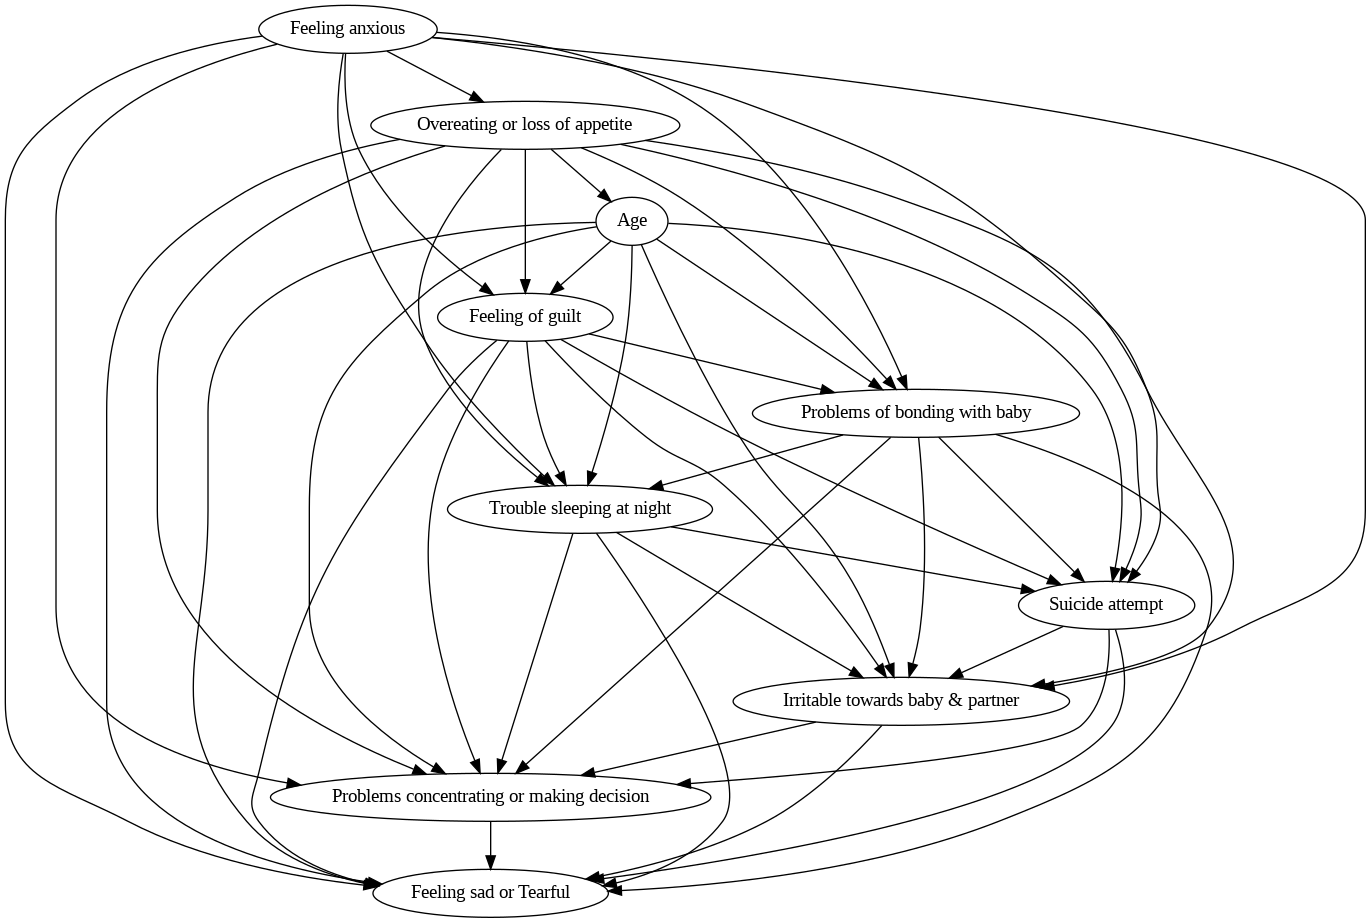

In [ ]:
hc1 = HillClimbSearch(df, HillClimbSearch(df))
est_model1 = hc1.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model1)).create_png()))

Like a detective trying to figure out the best way to represent relationships in a dataset. It uses a method called "hill climb search" twice to explore and discover the most likely connections between different pieces of information in the dataset (df).

The result is a visual representation of these relationships, kind of like a map of connections, which is then displayed for easier understanding.

So, it's essentially a tool for uncovering and showing the important links within the data.

In [ ]:
hc = HillClimbSearch(df)
best_model = hc.estimate()
edges = list(best_model.edges())
model = BayesianNetwork(edges)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
# Fitting the data to the model using Maximum Likelihood Estimator
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Doing exact inference using Variable Elimination
infer = VariableElimination(model)

In [ ]:
model.get_cpds

<bound method BayesianNetwork.get_cpds of <pgmpy.models.BayesianNetwork.BayesianNetwork object at 0x7d08d855ead0>>

In [ ]:
df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

In [ ]:
print(infer.query(variables=['Feeling anxious'], evidence={'Age':1}))

+--------------------+------------------------+
| Feeling anxious    |   phi(Feeling anxious) |
+====================+========================+
| Feeling anxious(0) |                 0.3659 |
+--------------------+------------------------+
| Feeling anxious(1) |                 0.6341 |
+--------------------+------------------------+


In [ ]:
print(infer.query(variables=['Feeling anxious'], evidence={'Overeating or loss of appetite':1}))

+--------------------+------------------------+
| Feeling anxious    |   phi(Feeling anxious) |
+====================+========================+
| Feeling anxious(0) |                 0.2627 |
+--------------------+------------------------+
| Feeling anxious(1) |                 0.7373 |
+--------------------+------------------------+


In [ ]:
print(infer.query(variables=['Feeling anxious'], evidence={'Age':0,'Feeling of guilt':1}))

+--------------------+------------------------+
| Feeling anxious    |   phi(Feeling anxious) |
+====================+========================+
| Feeling anxious(0) |                 0.1759 |
+--------------------+------------------------+
| Feeling anxious(1) |                 0.8241 |
+--------------------+------------------------+


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
for variable in model.nodes:
    cpd = MaximumLikelihoodEstimator(model, data).estimate_cpd(variable)
    model.add_cpds(cpd)

# Function to calculate Min-fill heuristic for a variable in a graph
def min_fill_heuristic(graph, variable):
    neighbors = set(graph.neighbors(variable))
    fill_edges = set()

    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and not graph.has_edge(neighbor1, neighbor2):
                fill_edges.add((neighbor1, neighbor2))

    return len(fill_edges)

# Find the variable elimination order using Min-fill heuristic
elimination_order = []
remaining_variables = set(model.nodes)

# Reverse the order to start eliminating from variables with fewer dependencies
while remaining_variables:
    variable_scores = {variable: min_fill_heuristic(model, variable) for variable in remaining_variables}
    min_score_variable = min(variable_scores, key=variable_scores.get)

    # Add "DEATH_EVENT" at the end of the elimination order
    if min_score_variable != 'Feeling anxious':
        elimination_order.append(min_score_variable)

    remaining_variables.remove(min_score_variable)

# Print the calculated variable elimination order
print("Variable Elimination Order:", elimination_order)

# Perform Variable Elimination with the calculated order
infer = VariableElimination(model)

Variable Elimination Order: ['Feeling sad or Tearful', 'Problems concentrating or making decision', 'Irritable towards baby & partner', 'Suicide attempt', 'Trouble sleeping at night', 'Problems of bonding with baby', 'Feeling of guilt', 'Age', 'Overeating or loss of appetite']


Updates a Bayesian Network by estimating Conditional Probability Distributions (CPDs) using Maximum Likelihood Estimation (MLE) for each variable. It then determines an efficient variable elimination order based on the Min-fill heuristic, a method to minimize computational complexity.

The calculated elimination order is printed, and Variable Elimination is performed on the Bayesian Network using this order, streamlining the process of obtaining probabilities for different variables.

The code is essentially refining and optimizing the Bayesian Network to make probabilistic inference more efficient.

In [ ]:
test = np.squeeze(data.iloc[:, -1].values)
predict_data = data.iloc[:, :-1]
y_pred = model.predict(predict_data)
acc2 = accuracy_score(np.squeeze(y_pred.values), test)

In [ ]:
print(acc2)

0.9725


<a id='Conclusion'></a>

## <b><span style='color:#2865C8'></span> Conclusion</b>
In this work, we considered a medical dataset to apply the Bayesian Network to compute the conditional probabilities based on the estimated Directed Acyclic Graph.

Different approaches were added also such as Markov Blanket, which could be useful in other purposes such as variable eliminations.
